In [466]:

from keras.models import load_model


In [467]:
model_path="/kaggle/input/model-1/facenet_keras.h5"

In [468]:
image_path="/kaggle/input/images/images"

In [469]:
image_path = "/kaggle/input/images/images"
image_files = [f for f in os.listdir(image_path) if f.endswith('.jpg')]
image_paths = [os.path.join(image_path, f) for f in image_files]

filename = '000109.jpg'
image_path = os.path.join(image_path, filename)
index = image_paths.index(image_path)
print(index)

350


In [470]:
image_filenames

['044746.jpg',
 '021556.jpg',
 '045235.jpg',
 '024570.jpg',
 '192464.jpg',
 '196492.jpg',
 '032486.jpg',
 '033404.jpg',
 '122251.jpg',
 '048016.jpg',
 '188155.jpg',
 '197109.jpg',
 '177808.jpg',
 '009563.jpg',
 '195701.jpg',
 '100063.jpg',
 '098185.jpg',
 '178497.jpg',
 '175948.jpg',
 '153139.jpg',
 '055899.jpg',
 '045016.jpg',
 '016713.jpg',
 '163046.jpg',
 '199065.jpg',
 '021688.jpg',
 '142245.jpg',
 '099010.jpg',
 '177181.jpg',
 '156290.jpg',
 '063128.jpg',
 '113851.jpg',
 '087948.jpg',
 '107175.jpg',
 '059548.jpg',
 '028027.jpg',
 '086952.jpg',
 '039287.jpg',
 '094744.jpg',
 '149201.jpg',
 '132822.jpg',
 '037724.jpg',
 '169431.jpg',
 '153301.jpg',
 '189849.jpg',
 '000599.jpg',
 '126317.jpg',
 '007667.jpg',
 '089683.jpg',
 '006233.jpg',
 '180208.jpg',
 '120123.jpg',
 '019600.jpg',
 '145216.jpg',
 '166438.jpg',
 '004105.jpg',
 '162172.jpg',
 '142494.jpg',
 '188011.jpg',
 '005988.jpg',
 '065274.jpg',
 '118884.jpg',
 '153559.jpg',
 '200368.jpg',
 '192879.jpg',
 '185955.jpg',
 '133117.j

In [471]:
input_image_path = "/kaggle/input/images/images/202517.jpg"

In [472]:
id_pair_path="/kaggle/input/id-pair/id-pair.csv"


In [473]:
id_pair = pd.read_csv(id_pair_path)

# Print names of images in the id-pair.csv file
fid_pair=id_pair['fid'].values
pid_pair=id_pair['pid'].values


In [474]:
fid_pair[120]

'021966.jpg'

In [475]:
print(image_filenames[0])
print(fid_pair[1])
print(pid_pair[1])

044746.jpg
000308.jpg
8939


In [476]:
# Filter rows where fid = '011185.jpg'
row = id_pair.loc[id_pair['fid'] == '011185.jpg']

# Print the corresponding pid value if a match is found
if not row.empty:
    print(row['pid'].values[0])
else:
    print('No matching pid value found')

7426


In [477]:
name= os.path.basename(image_paths[index])
row = id_pair.loc[id_pair['fid'] == name]

# Print the corresponding pid value if a match is found
if not row.empty:
    print(row['pid'].values[0])


3325


In [478]:
def get_pid_from_fid(name):
    row = id_pair.loc[id_pair['fid'] == name]
    if not row.empty:
        return row['pid'].values[0]
    else:
        return None

In [479]:
name='000109.jpg'
pid = get_pid_from_fid(name)
print(pid)

3325


In [480]:
model = load_model(model_path)


In [481]:
print(model.inputs)



[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]


In [482]:
print(model.outputs)

[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [483]:
input_size = (160, 160)

In [484]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model


In [485]:
def load_facenet_model(model_path):
    return load_model(model_path)

In [486]:
def resize_image(image_path, new_size=(160, 160)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, new_size)
    return img


In [487]:
def normalize_image(img):
    mean, std = img.mean(), img.std()
    img = (img - mean) / std
    return img


In [488]:
def img2vec(image_path, model, target_size=(160, 160)):
    # Load and preprocess image
    img = resize_image(image_path, target_size)
    img = normalize_image(img)
    img = np.expand_dims(img, axis=0)
    # Generate embedding vector
    vector = model.predict(img)
    # Normalize vector
    vector = vector / np.linalg.norm(vector)
    return vector

In [489]:
def find_nearest_images(input_vector, image_paths, model, top_k=5, nearest_image_path=False):
    distances = []
    i = 0
    while i < len(image_paths):
        vector = img2vec(image_paths[i], model)
        distance = np.linalg.norm(input_vector - vector)
        distances.append(distance)
        i += 1
    indices = np.argsort(distances)[1:top_k+1]
    if nearest_image_path:
        return [(image_paths[i], distances[i]) for i in indices]
    else:
        return indices


In [490]:
def plot_nearest_images(input_image_path, image_paths, indices):
    fig, axes = plt.subplots(1, len(indices)+1, figsize=(15, 10))

    # Plot input image
    img = cv2.imread(input_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(img)
    axes[0].axis('off')
    axes[0].set_title('Input Image')

    # Plot nearest images
    i = 0
    while i < len(indices):
        img = cv2.imread(image_paths[indices[i]])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        name = os.path.basename(image_paths[indices[i]])
        pid_index = get_pid_from_fid(name)
        axes[i+1].imshow(img)
        axes[i+1].axis('off')
        axes[i+1].set_title(f'Nearest Image {i+1}: {pid_index}')
        i += 1

    plt.show()


In [491]:
input_image_path = "/kaggle/input/images/images/202517.jpg"


# Load model
model = load_facenet_model(model_path)

In [492]:
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')]


In [493]:
input_vector = img2vec(input_image_path, model, target_size=target_size)

1/1 [==============================] - 3s 3s/step


In [494]:
indices = find_nearest_images(input_vector, image_paths, model, top_k=5)

1/1 [==============================] - 0s 73ms/step


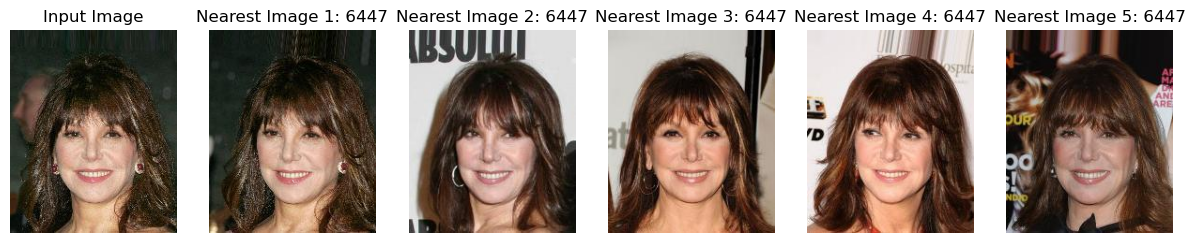

In [495]:
plot_nearest_images(input_image_path, image_paths, indices)
